In [24]:
import pandas as pd

irts_md = pd.read_csv('./GIRT/characteristics_irts_markdown.csv')
irts_yaml = pd.read_csv('./GIRT/characteristics_irts_yaml.csv')
irts_repo = pd.read_csv('./GIRT/characteristics_repo.csv')

# if special characters in the 'labels' column values, remove them
irts_md['labels'] = irts_md['labels'].str.replace("'", '')
irts_md['labels'] = irts_md['labels'].str.replace('"', '')

In [25]:
irts_repo.columns

Index(['full_name', 'is_fork', 'has_issues', 'created_at', 'last_modified',
       'pushed_at', 'main_language', 'total_issues_count', 'open_issues_count',
       'closed_issues_count', 'total_pull_requests_count',
       'open_pull_requests_count', 'closed_pull_requests_count', 'size',
       'topics', 'stargazers_count', 'subscribers_count', 'forks_count',
       'commits_count', 'assignees_count', 'branches_count', 'releases_count',
       'is_archive', 'has_wiki', 'contributors_count', 'open_issues_countv2',
       'closed_issues_countv2', 'total_issues_countv2', 'has_IRT'],
      dtype='object')

In [26]:
irts_repo[(irts_repo['main_language'] == 'Python') & irts_repo['has_IRT'] & irts_repo['has_issues'] & (irts_repo['total_issues_countv2'] >= 100) & (irts_repo['stargazers_count'] >= 100) & (irts_repo['assignees_count'] > 1)].sort_values(by='pushed_at', ascending=False)

,full_name,is_fork,has_issues,created_at,last_modified,pushed_at,main_language,total_issues_count,open_issues_count,closed_issues_count,...,assignees_count,branches_count,releases_count,is_archive,has_wiki,contributors_count,open_issues_countv2,closed_issues_countv2,total_issues_countv2,has_IRT
388212,great-expectations/great_expectations,False,True,2017-09-11 00:18:46,"Tue, 31 Jan 2023 10:06:36 GMT",2023-01-31 11:39:33,Python,6882.0,264.0,6618.0,...,32.0,166.0,187.0,False,True,349.0,211.0,1286.0,1497.0,True
9816,granulate/gprofiler,False,True,2021-02-25 11:47:02,"Mon, 30 Jan 2023 11:29:54 GMT",2023-01-31 09:44:05,Python,667.0,93.0,574.0,...,120.0,21.0,58.0,False,True,32.0,69.0,56.0,125.0,True
221761,goverfl0w/discord-interactions,False,True,2020-12-11 11:10:59,"Mon, 30 Jan 2023 06:09:05 GMT",2023-01-31 03:45:22,Python,1218.0,10.0,1208.0,...,17.0,7.0,62.0,False,False,80.0,5.0,378.0,383.0,True
992436,graiaproject/ariadne,False,True,2021-10-16 15:53:38,"Tue, 31 Jan 2023 07:46:33 GMT",2023-01-31 00:00:21,Python,211.0,3.0,208.0,...,9.0,6.0,41.0,False,False,17.0,3.0,113.0,116.0,True
150462,googlechrome/chromium-dashboard,False,True,2013-03-07 18:18:10,"Mon, 30 Jan 2023 01:14:05 GMT",2023-01-30 22:31:44,Python,2651.0,355.0,2296.0,...,30.0,59.0,0.0,False,True,60.0,352.0,766.0,1118.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715313,kivy/kivy-designer,False,True,2012-09-24 23:03:32,"Mon, 05 Dec 2022 07:30:21 GMT",2020-03-02 20:06:25,Python,404.0,142.0,262.0,...,8.0,1.0,0.0,True,False,18.0,138.0,140.0,278.0,True
401395,jobbole/translation-project,False,True,2018-05-15 11:40:13,"Thu, 19 Jan 2023 03:05:06 GMT",2020-01-02 08:09:13,Python,179.0,75.0,104.0,...,53.0,2.0,0.0,False,True,21.0,70.0,50.0,120.0,True
951359,dbeker/faster-rcnn-tensorflow-python3,False,True,2017-06-09 08:38:31,"Fri, 13 Jan 2023 14:51:29 GMT",2019-07-31 08:01:06,Python,127.0,15.0,112.0,...,2.0,2.0,0.0,True,False,1.0,15.0,106.0,121.0,True
603817,ansible/mazer,False,True,2018-04-18 19:16:06,"Thu, 02 Jun 2022 14:44:42 GMT",2019-07-19 14:31:24,Python,291.0,36.0,255.0,...,40.0,1.0,0.0,True,True,8.0,33.0,86.0,119.0,True


In [27]:
import re
import ast

mds = irts_md[["name", "full_name", "headlines", "labels", "about", "IRT_name"]].copy()
mds['headlines'] = mds['headlines'].apply(lambda x: ast.literal_eval(x))

# 영어, 숫자, 공백, 특수문자 제외 모두 제거
mds = mds.dropna()
mds['labels'] = mds['labels'].apply(lambda x: x.lower())
mds['labels'] = mds['labels'].apply(lambda x: re.sub('[^a-z0-9 ,]', '', x))
mds['labels'] = mds['labels'].apply(lambda x: x.strip())

mds['name'] = mds['name'].apply(lambda x: x.strip())
mds['name'] = mds['name'].apply(lambda x: re.sub('[\-_]', ' ', x))
mds['name'] = mds['name'].apply(lambda x: x.lower())
# remove \u00~
mds['name'] = mds['name'].apply(lambda x: re.sub(r'\\u00\S+', '', x))
mds['name'] = mds['name'].apply(lambda x: re.sub(r'u00\S+', '', x))

# remove emojis
mds['name'] = mds['name'].apply(lambda x: re.sub('[^\w\s]', '', x))
mds['name'] = mds['name'].apply(lambda x: re.sub('[^a-z0-9 ]', '', x))
mds['name'] = mds['name'].apply(lambda x: x.strip())
mds = mds[mds['name'] != '']

mds['IRT_name'] = mds['IRT_name'].apply(lambda x: re.sub('[\-_]', ' ', x))
mds['IRT_name'] = mds['IRT_name'].apply(lambda x: x.lower())
mds['IRT_name'] = mds['IRT_name'].apply(lambda x: x.strip())

mds = mds.dropna()

mds.loc[mds['name'].str.contains('bug'), 'name'] = 'bug report'
mds.loc[mds['name'].str.contains('documentation'), 'name'] = 'documentation'
mds.loc[mds['name'].str.contains('feature'), 'name'] = 'feature request'
mds.loc[mds['name'].str.contains('support'), 'name'] = 'support'
mds.loc[mds['name'].str.contains('question'), 'name'] = 'question'
mds.loc[mds['name'].str.contains('proposal'), 'name'] = 'suggestion'
mds.loc[mds['name'].str.contains('enhancement'), 'name'] = 'enhancement'
mds.loc[mds['name'].str.contains('issue'), 'name'] = 'issue'

mds.loc[mds['labels'].str.contains('bug'), 'labels'] = 'bug'
mds.loc[mds['labels'].str.contains('enhancement'), 'labels'] = 'enhancement'
mds.loc[mds['labels'].str.contains('triage'), 'labels'] = 'triage'
mds.loc[mds['labels'].str.contains('feature'), 'labels'] = 'feature'
mds.loc[mds['labels'].str.contains('new'), 'labels'] = 'feature'
mds.loc[mds['labels'].str.contains('question'), 'labels'] = 'question'
mds.loc[mds['labels'].str.contains('doc'), 'labels'] = 'documentation'
# mds.loc[mds['labels'].str.contains('request'), 'labels'] = 'feature'
mds.loc[mds['labels'].str.contains('proposal'), 'labels'] = 'suggestion'

mds.loc[mds['labels'].str.contains('feature'), 'labels'] = 'feature-request'
mds.loc[mds['labels'].str.contains('triage'), 'labels'] = 'needs-triage'

# if labels are empty, convert to 'EMPTY'
mds.loc[mds['labels'] == '', 'labels'] = 'EMPTY'

# split labels by comma
mds['labels'] = mds['labels'].apply(lambda x: x.split(','))
before = len(mds)

mds = mds[mds['labels'].apply(lambda x: len(x) == 1)]
mds['labels'] = mds['labels'].apply(lambda x: x[0])
print(f'Ratio of single labels: {len(mds)} / {before} ({len(mds) / before}%)')

various_label_types = mds.groupby('labels').count().sort_values(by='headlines', ascending=False).index.tolist()
print(f'The number of label types: {len(various_label_types)}')

label_types = mds.groupby('labels').count().sort_values(by='headlines', ascending=False)
label_types = label_types.rename(columns={'headlines': 'count'})
label_types = label_types[['count']]

# label_types = label_types[label_types['count'] > label_types['count'].quantile(0.995)]

top_indices = ['bug report',
 'feature request',
 'question',
 'issue',
 'documentation',
 'enhancement',
 'support',
 'suggestion',
 'task',
 'request']
before = len(mds)
mds = mds[mds['name'].isin(top_indices)]
print(f'Ratio of top 10 names: {len(mds)} / {before} ({len(mds) / before}%)')

# remove headline type
mds['headlines'] = mds['headlines'].apply(lambda x: [i[1] for i in x])
mds['count_headlines'] = mds['headlines'].apply(lambda x: len(x))

# remove empty headlines
mds = mds[mds['count_headlines'] > 0]
mds

Ratio of single labels: 78024 / 78566 (0.9931013415472342%)
The number of label types: 2045
Ratio of top 10 names: 70512 / 78024 (0.9037219317133189%)


,name,full_name,headlines,labels,about,IRT_name,count_headlines
0,bug report,watery-desert/water_drop_nav_bar,"[Describe the bug, To Reproduce, Expected beha...",EMPTY,Create a report to help us improve,bug report,4
1,bug report,ohif/react-viewerbase,"[Before Creating an issue, Describe the bug, S...",bug,Create a report to help us improve,bug report,6
2,support,ohif/react-viewerbase,[Description],question,"""I have a question \U0001F4AC""",support question,1
3,feature request,ohif/react-viewerbase,"[Awesome, do you have an idea? 😍, feature requ...",enhancement,Suggest an idea for this project,feature request,3
4,bug report,kate-orlova/google-places-in-sitecore,"[Describe the bug, To Reproduce, Expected beha...",EMPTY,Create a report to help us improve,bug report,7
...,...,...,...,...,...,...,...
98540,bug report,qbcore-framework/qb-input,"[Describe the bug, To Reproduce, Expected beha...",bug,Create a report to help us improve or fix some...,bug report,6
98541,task,bcgov/wps,"[Describe the task, Acceptance Criteria, Addit...",task,Work for the team that cannot be written as a ...,task,3
98546,bug report,bcgov/wps,"[Actual Behaviour, Steps To Reproduce, Screens...",bug,Create a report to help us improve,bug,4
98548,feature request,datadog/datadog-ci,[Is your feature request related to a problem?...,enhancement,Suggest an idea or request a feature,feature request,4


In [28]:
# ratio of each name type

top_names = mds.groupby('name').count().sort_values(by='headlines', ascending=False).rename(columns={'headlines': 'count'})
top_names['ratio'] = top_names['count'] / top_names['count'].sum() * 100
num_of_headlines = mds.groupby('name').mean(numeric_only=True).sort_values(by='count_headlines', ascending=False).rename(columns={'count_headlines': 'mean_#_of_headlines'})
# concat two dataframes
top_names = pd.concat([top_names, num_of_headlines], axis=1)
top_names = top_names[['count', 'ratio', 'mean_#_of_headlines']]

top_names

,count,ratio,mean_#_of_headlines
name,,,
bug report,32140,49.433985,6.058370
feature request,26450,40.682294,3.878223
question,1999,3.074628,2.356178
issue,1603,2.465547,4.443543
documentation,1022,1.571921,2.853229
enhancement,741,1.139719,3.381916
support,455,0.699828,3.843956
suggestion,350,0.538329,4.145714
task,155,0.238403,3.109677


65016


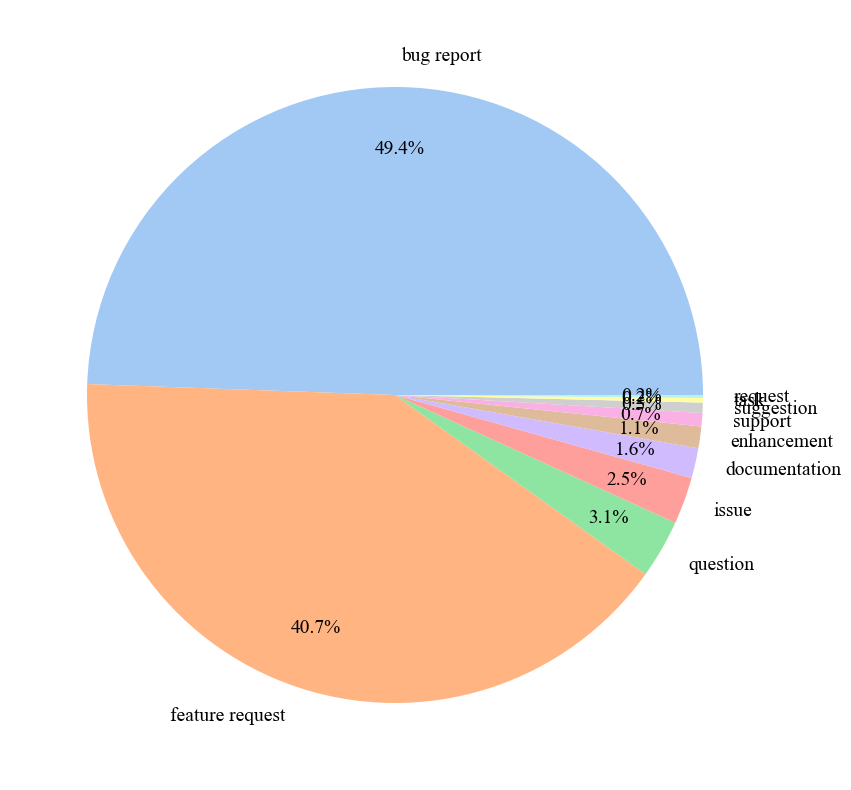

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart(df):
    colors = sns.color_palette('pastel')
    plt.figure(figsize=(10,10))
    plt.pie(df['count'], labels=df.index, colors=colors, autopct="%.1f%%", textprops={'fontsize': 14, 'fontname':'Times New Roman'}, pctdistance=0.8, labeldistance=1.1)

    # plt.savefig('{}.png'.format(title.replace('\n', '')), format='png', dpi=1200, bbox_inches='tight', pad_inches=0.1, transparent=False)
    
    print(df['count'].sum())

pie_chart(top_names.drop(['mean_#_of_headlines', 'ratio'], axis=1))

In [11]:
label_types['ratio'] = label_types['count'] / label_types['count'].sum() * 100
label_types

,count,ratio
labels,,
EMPTY,32741,41.962729
bug,18059,23.145442
enhancement,11118,14.249462
feature-request,4606,5.903312
question,3001,3.846252
...,...,...
improvements,1,0.001282
implementation request,1,0.001282
implementation,1,0.001282


In [12]:
# groupby labels and mean of count_headlines
mds.groupby('name').mean().sort_values(by='count_headlines', ascending=False).rename(columns={'count_headlines': 'mean_count_headlines'})

/var/folders/tf/qxc6fvcj1cs804t6nk1kq60m0000gn/T/ipykernel_39862/946441931.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mds.groupby('name').mean().sort_values(by='count_headlines', ascending=False).rename(columns={'count_headlines': 'mean_count_headlines'})


,mean_count_headlines
name,
bug report,6.058370
issue,4.443543
request,4.247525
suggestion,4.145714
feature request,3.878223
support,3.843956
enhancement,3.381916
task,3.109677
documentation,2.853229


In [13]:
mds.reset_index(drop=True, inplace=True)
mds.index.name = 'id'
mds

,name,full_name,headlines,labels,about,IRT_name,count_headlines
id,,,,,,,
0,bug report,watery-desert/water_drop_nav_bar,"[Describe the bug, To Reproduce, Expected beha...",EMPTY,Create a report to help us improve,bug report,4
1,bug report,ohif/react-viewerbase,"[Before Creating an issue, Describe the bug, S...",bug,Create a report to help us improve,bug report,6
2,support,ohif/react-viewerbase,[Description],question,"""I have a question \U0001F4AC""",support question,1
3,feature request,ohif/react-viewerbase,"[Awesome, do you have an idea? 😍, feature requ...",enhancement,Suggest an idea for this project,feature request,3
4,bug report,kate-orlova/google-places-in-sitecore,"[Describe the bug, To Reproduce, Expected beha...",EMPTY,Create a report to help us improve,bug report,7
...,...,...,...,...,...,...,...
65011,bug report,qbcore-framework/qb-input,"[Describe the bug, To Reproduce, Expected beha...",bug,Create a report to help us improve or fix some...,bug report,6
65012,task,bcgov/wps,"[Describe the task, Acceptance Criteria, Addit...",task,Work for the team that cannot be written as a ...,task,3
65013,bug report,bcgov/wps,"[Actual Behaviour, Steps To Reproduce, Screens...",bug,Create a report to help us improve,bug,4


In [14]:
data = mds.drop(['count_headlines'], axis=1, inplace=False)
data.dropna(inplace=True)
data['headlines'] = data['headlines'].apply(lambda x: list(map(lambda y: re.sub('[^a-z0-9 ]', '', str(y).lower()).strip(), x)))
data = data[data['headlines'].apply(lambda x: len(x) > 0)]
data['headlines'] = data['headlines'].apply(lambda x: list(filter(lambda y: y != '', x)))
data.reset_index(drop=True, inplace=True)
data.index.name = 'id'

In [15]:
bug_report = ['describe the bug', 'to reproduce', 'expected behavior', 'screenshots', 'desktop please complete the following information', 'smartphone please complete the following information', 'additional context']
feature_request = ['is your feature request related to a problem please describe', 'describe the solution youd like', 'describe alternatives youve considered', 'additional context']
default_templates = list(set(bug_report + feature_request))

data['customized_heads'] = data['headlines'].apply(lambda x: list(set(x) - set(default_templates)))

for template in default_templates:
    data[template] = data['headlines'].apply(lambda x: template in x)

data

,name,full_name,headlines,labels,about,IRT_name,customized_heads,describe the bug,describe alternatives youve considered,to reproduce,desktop please complete the following information,describe the solution youd like,expected behavior,smartphone please complete the following information,additional context,is your feature request related to a problem please describe,screenshots
id,,,,,,,,,,,,,,,,,
0,bug report,watery-desert/water_drop_nav_bar,"[describe the bug, to reproduce, expected beha...",EMPTY,Create a report to help us improve,bug report,[],True,False,True,False,False,True,False,False,False,True
1,bug report,ohif/react-viewerbase,"[before creating an issue, describe the bug, s...",bug,Create a report to help us improve,bug report,"[before creating an issue, environment, steps ...",True,False,False,False,False,True,False,True,False,False
2,support,ohif/react-viewerbase,[description],question,"""I have a question \U0001F4AC""",support question,[description],False,False,False,False,False,False,False,False,False,False
3,feature request,ohif/react-viewerbase,"[awesome do you have an idea, feature request ...",enhancement,Suggest an idea for this project,feature request,"[feature request improvement or idea, awesome ...",False,False,False,False,False,False,False,False,False,False
4,bug report,kate-orlova/google-places-in-sitecore,"[describe the bug, to reproduce, expected beha...",EMPTY,Create a report to help us improve,bug report,[],True,False,True,True,False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65011,bug report,qbcore-framework/qb-input,"[describe the bug, to reproduce, expected beha...",bug,Create a report to help us improve or fix some...,bug report,[questions please complete the following infor...,True,False,True,False,False,True,False,True,False,True
65012,task,bcgov/wps,"[describe the task, acceptance criteria, addit...",task,Work for the team that cannot be written as a ...,task,"[describe the task, acceptance criteria]",False,False,False,False,False,False,False,True,False,False
65013,bug report,bcgov/wps,"[actual behaviour, steps to reproduce, screens...",bug,Create a report to help us improve,bug,"[actual behaviour, expected behaviour, steps t...",False,False,False,False,False,False,False,False,False,True


In [16]:
# IRTs that based on the default templates
# bug-repot
br_preserved = data[(data[bug_report[0]] == True) & (data[bug_report[1]] == True) & (data[bug_report[2]] == True) & (data[bug_report[3]] == True) & (data[bug_report[4]] == True) & (data[bug_report[5]] == True)]
br_revised = data[(data[bug_report[0]] == True) | (data[bug_report[1]] == True) | (data[bug_report[2]] == True) | (data[bug_report[3]] == True) | (data[bug_report[4]] == True) | (data[bug_report[5]] == True) ]
br_added = br_preserved[br_preserved['customized_heads'].apply(lambda x: len(x) > 0)]

# feature-request
fr_preserved = data[(data[feature_request[0]] == True) & (data[feature_request[1]] == True) & (data[feature_request[2]] == True) ]
fr_revised = data[(data[feature_request[0]] == True) | (data[feature_request[1]] == True) | (data[feature_request[2]] == True)]
fr_added = fr_preserved[fr_preserved['customized_heads'].apply(lambda x: len(x) > 0)]

# both bug-report and feature-request
both = data[(data[bug_report[0]] == True) | (data[bug_report[1]] == True) | (data[bug_report[2]] == True) | (data[bug_report[3]] == True) | (data[bug_report[4]] == True) | (data[bug_report[5]] == True) | (data[feature_request[0]] == True) | (data[feature_request[1]] == True) | (data[feature_request[2]] == True) | (data[feature_request[3]] == True)]
both_contained = data[((data[bug_report[0]] == True) | (data[bug_report[1]] == True) | (data[bug_report[2]] == True) | (data[bug_report[3]] == True) | (data[bug_report[4]] == True) | (data[bug_report[5]] == True)) & ((data[feature_request[0]] == True) | (data[feature_request[1]] == True) | (data[feature_request[2]] == True))]
additional_contexts = data[(data['additional context'] == True)]

# IRTs that based on the customized templates
fully_customized = data[(data['customized_heads'].apply(lambda x: len(x) > 0)) & (data[bug_report[0]] == False) & (data[bug_report[1]] == False) & (data[bug_report[2]] == False) & (data[bug_report[3]] == False) & (data[bug_report[4]] == False) & (data[bug_report[5]] == False) & (data[bug_report[6]] == False) & (data[feature_request[0]] == False) & (data[feature_request[1]] == False) & (data[feature_request[2]] == False) & (data[feature_request[3]] == False)]

In [17]:
num_samples = len(data)
print(f'The number of samples: {num_samples}')

# ratio of IRTs that based on the default templates
print(f'Ratio of BR preserved: {len(br_preserved)} ({len(br_preserved) / num_samples * 100:.2f}%)')
print(f'Ratio of BR revised: {len(br_revised)} ({len(br_revised) / num_samples * 100:.2f}%)')
print(f'Ratio of BR added: {len(br_added)} ({len(br_added) / num_samples * 100:.2f}%)')

print(f'Ratio of FR preserved: {len(fr_preserved)} ({len(fr_preserved) / num_samples * 100:.2f}%)')
print(f'Ratio of FR revised: {len(fr_revised)} ({len(fr_revised) / num_samples * 100:.2f}%)')
print(f'Ratio of FR added: {len(fr_added)} ({len(fr_added) / num_samples * 100:.2f}%)')

print(f'Ratio of both: {len(both)} ({len(both) / num_samples * 100:.2f}%)')
print(f'Ratio of both contained: {len(both_contained)} ({len(both_contained) / num_samples * 100:.2f}%)')
print(f'Ratio of additional contexts: {len(additional_contexts)} ({len(additional_contexts) / num_samples * 100:.2f}%)')

# ratio of IRTs that based on the customized templates
print(f'Ratio of fully customized: {len(fully_customized)} ({len(fully_customized) / num_samples * 100:.2f}%)')

# ratio of revised IRTs
print(f'Ratio of revised: {len(br_revised) + len(fr_revised)} ({(len(br_revised) + len(fr_revised)) / num_samples * 100:.2f}%)')
# ratio of preseved IRTs
print(f'Ratio of preserved: {len(br_preserved) + len(fr_preserved)} ({(len(br_preserved) + len(fr_preserved)) / num_samples * 100:.2f}%)')
print(78.61-38.68)


The number of samples: 65016
Ratio of BR preserved: 7190 (11.06%)
Ratio of BR revised: 27942 (42.98%)
Ratio of BR added: 377 (0.58%)
Ratio of FR preserved: 17955 (27.62%)
Ratio of FR revised: 20762 (31.93%)
Ratio of FR added: 1218 (1.87%)
Ratio of both: 51109 (78.61%)
Ratio of both contained: 42 (0.06%)
Ratio of additional contexts: 43706 (67.22%)
Ratio of fully customized: 13413 (20.63%)
Ratio of revised: 48704 (74.91%)
Ratio of preserved: 25145 (38.68%)
39.93


In [18]:
# explode headlines
exploded = data[['headlines', 'labels']].explode('headlines')
exploded['from_default'] = exploded['headlines'].apply(lambda x: x in default_templates)
exploded['from_BR'] = exploded['headlines'].apply(lambda x: x in bug_report)
exploded['from_FR'] = exploded['headlines'].apply(lambda x: x in feature_request)

# remove duplicates
exploded['id'] = exploded.index
exploded.drop_duplicates(subset=['id', 'headlines', 'labels'], inplace=True)

exploded[exploded['from_default'] == True].groupby('headlines').count().sort_values(by='labels', ascending=False).rename(columns={'labels': 'counts'})['counts']


headlines
additional context                                              43706
expected behavior                                               24515
describe the bug                                                23128
to reproduce                                                    21194
describe the solution youd like                                 19962
is your feature request related to a problem please describe    19337
describe alternatives youve considered                          19177
screenshots                                                     18798
desktop please complete the following information               10143
smartphone please complete the following information             7786
Name: counts, dtype: int64

In [19]:
exploded[exploded['from_BR'] == True].groupby('headlines').count().sort_values(by='labels', ascending=False).rename(columns={'labels': 'counts'})['counts']


headlines
additional context                                      43706
expected behavior                                       24515
describe the bug                                        23128
to reproduce                                            21194
screenshots                                             18798
desktop please complete the following information       10143
smartphone please complete the following information     7786
Name: counts, dtype: int64

In [20]:
exploded[exploded['from_FR'] == True].groupby('headlines').count().sort_values(by='labels', ascending=False).rename(columns={'labels': 'counts'})['counts']


headlines
additional context                                              43706
describe the solution youd like                                 19962
is your feature request related to a problem please describe    19337
describe alternatives youve considered                          19177
Name: counts, dtype: int64

In [21]:
exploded[exploded['from_default'] == False].groupby('headlines').count().sort_values(by='labels', ascending=False).rename(columns={'labels': 'counts'})['counts'][:10]

headlines
steps to reproduce                                       3840
description                                              3429
environment                                              3271
actual behavior                                          1582
additional information                                   1167
expected behaviour                                       1155
current behavior                                         1136
environment please complete the following information    1036
logs                                                      942
versions                                                  867
Name: counts, dtype: int64

In [22]:
final = exploded.loc[:,:]

final['headlines'] = final['headlines'].apply(lambda x: 'to reproduce' if 'reproduce' in str(x) else x)
final['headlines'] = final['headlines'].apply(lambda x: 'expected behavior' if 'expected behaviour' == str(x) else x)
final['headlines'] = final['headlines'].apply(lambda x: 'environment' if 'environment' in str(x) else x)
final['headlines'] = final['headlines'].apply(lambda x: 'additional context' if 'context' in str(x) or 'additional information' in str(x) else x)
final['headlines'] = final['headlines'].apply(lambda x: 'actual behavior' if 'current behavior' == str(x) else x)
rankings = final.groupby('headlines').count().sort_values(by='labels', ascending=False).rename(columns={'labels': 'counts'})
rankings

,counts,from_default,from_BR,from_FR,id
headlines,,,,,
additional context,46614,46614,46614,46614,46614
to reproduce,28233,28233,28233,28233,28233
expected behavior,25670,25670,25670,25670,25670
describe the bug,23128,23128,23128,23128,23128
describe the solution youd like,19962,19962,19962,19962,19962
...,...,...,...,...,...
if there is an issue with your workflow then please include a log link or output as well as your full workflow config file,1,1,1,1,1
if this change is not made,1,1,1,1,1
if this feature request is accepted would you be willing to work on a pr,1,1,1,1,1


In [23]:
rankings['counts'][:20] / len(final) * 100

# tops = final[final['counts'] > final['counts'].quantile(0.999)]

headlines
additional context                                              14.873644
to reproduce                                                     9.008615
expected behavior                                                8.190810
describe the bug                                                 7.379706
describe the solution youd like                                  6.369496
is your feature request related to a problem please describe     6.170070
describe alternatives youve considered                           6.119017
screenshots                                                      5.998086
desktop please complete the following information                3.236439
smartphone please complete the following information             2.484365
environment                                                      2.262285
description                                                      1.094129
actual behavior                                                  0.867262
logs                        